In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv('GIST/gistdescriptor/csv/genre_base.csv')
# data = data.rename(columns={'513': 'movimento'})

In [3]:
data.head()

,1,2,3,4,5,6,7,8,9,10,...,504,505,506,507,508,509,510,511,512,genre
0,0.017317,0.030186,0.030815,0.028425,0.020348,0.078890,0.069217,0.025063,0.006336,0.041223,...,0.037972,0.009403,0.045007,0.040966,0.045195,0.026202,0.047200,0.053431,0.043252,abstract
1,0.032988,0.069236,0.047456,0.045452,0.024791,0.043263,0.040768,0.045343,0.018062,0.053376,...,0.050639,0.011965,0.048397,0.056287,0.060342,0.015037,0.041248,0.032714,0.054782,abstract
2,0.011896,0.018126,0.071212,0.060199,0.057507,0.119530,0.121630,0.081846,0.066783,0.090399,...,0.079447,0.073644,0.088853,0.076518,0.061559,0.039568,0.047357,0.061773,0.078261,abstract
3,0.025888,0.036705,0.069812,0.077940,0.028389,0.066660,0.098081,0.070147,0.082244,0.091343,...,0.057203,0.045338,0.078526,0.074957,0.047541,0.051921,0.078097,0.074750,0.057616,abstract
4,0.025851,0.044690,0.045490,0.041398,0.026192,0.050661,0.077047,0.046822,0.010360,0.023991,...,0.067070,0.011698,0.023013,0.049261,0.046258,0.032265,0.053014,0.062464,0.040600,abstract


In [4]:
X = data.drop(['genre'], axis=1)
Y = data['genre']

In [5]:
X.head()

,1,2,3,4,5,6,7,8,9,10,...,503,504,505,506,507,508,509,510,511,512
0,0.017317,0.030186,0.030815,0.028425,0.020348,0.078890,0.069217,0.025063,0.006336,0.041223,...,0.056990,0.037972,0.009403,0.045007,0.040966,0.045195,0.026202,0.047200,0.053431,0.043252
1,0.032988,0.069236,0.047456,0.045452,0.024791,0.043263,0.040768,0.045343,0.018062,0.053376,...,0.038511,0.050639,0.011965,0.048397,0.056287,0.060342,0.015037,0.041248,0.032714,0.054782
2,0.011896,0.018126,0.071212,0.060199,0.057507,0.119530,0.121630,0.081846,0.066783,0.090399,...,0.096646,0.079447,0.073644,0.088853,0.076518,0.061559,0.039568,0.047357,0.061773,0.078261
3,0.025888,0.036705,0.069812,0.077940,0.028389,0.066660,0.098081,0.070147,0.082244,0.091343,...,0.058751,0.057203,0.045338,0.078526,0.074957,0.047541,0.051921,0.078097,0.074750,0.057616
4,0.025851,0.044690,0.045490,0.041398,0.026192,0.050661,0.077047,0.046822,0.010360,0.023991,...,0.077882,0.067070,0.011698,0.023013,0.049261,0.046258,0.032265,0.053014,0.062464,0.040600


In [6]:
Y.head()

0    abstract
1    abstract
2    abstract
3    abstract
4    abstract
Name: genre, dtype: object

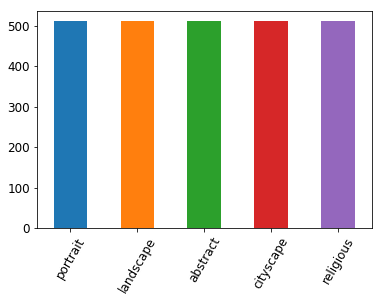

In [7]:
data['genre'].value_counts().plot(kind='bar', rot=60, fontsize=12)

In [8]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=7)
##for train_index, test_index in kfold.split(X):

## Random forest

from sklearn.ensemble import RandomForestClassifier

clf_rf = RandomForestClassifier(random_state=0)

param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

grid_search = GridSearchCV(clf_rf, param_grid=param_grid)
grid_search.fit(X, Y)

results_rf = cross_val_score(grid_search, X, Y, cv=kfold)
print (results_rf.mean())

## MLP

In [9]:
from sklearn.neural_network import MLPClassifier

param_grid = {'solver' : ['lbfgs', 'sgd', 'adam'],
              'activation' : ['identity', 'logistic', 'tanh', 'relu'],
              'learning_rate' : ['constant', 'invscaling', 'adaptive'],
              'max_iter': [1500, 2000]
             }

clf = MLPClassifier(random_state=0)

grid_search_mlp = GridSearchCV(clf, param_grid=param_grid)
grid_search_mlp.fit(X, Y)

clf = grid_search_mlp.best_estimator_

/home/pedrotorres/miniconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pedrotorres/miniconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pedrotorres/miniconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pedrotorres/miniconda3/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1500) reached and the op

In [12]:
results_mlp = cross_val_score(clf, X, Y, cv=kfold)

NameError: name 'results_rf' is not defined

In [13]:
print (results_mlp.mean())

0.2774213210997401
